# Skin Cancer Detection using CNN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [3]:
base_dir = '/content/drive/MyDrive/Skin-Cancer'
train_dir = os.path.join(base_dir, 'train')
test_dir  = os.path.join(base_dir, 'test')

In [4]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 2122 images belonging to 2 classes.
Found 529 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [6]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 456s 7s/step - accuracy: 0.5926 - loss: 0.7301 - val_accuracy: 0.7259 - val_loss: 0.5331
Epoch 2/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 595ms/step - accuracy: 0.7846 - loss: 0.4790 - val_accuracy: 0.7505 - val_loss: 0.5020
Epoch 3/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 594ms/step - accuracy: 0.7894 - loss: 0.4517 - val_accuracy: 0.7637 - val_loss: 0.4979
Epoch 4/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 593ms/step - accuracy: 0.8040 - loss: 0.4189 - val_accuracy: 0.7883 - val_loss: 0.4552
Epoch 5/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 609ms/step - accuracy: 0.8147 - loss: 0.4027 - val_accuracy: 0.7750 - val_loss: 0.4552
Epoch 6/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 619ms/step - accuracy: 0.8113 - loss: 0.4129 - val_accuracy: 0.8072 - val_loss: 0.4354
Epoch 7/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 596ms/step - accuracy: 0.8126 - loss: 0.4065 - val_accuracy: 0.8034 - val_loss: 0.4355
Epoch 8/15
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 610ms/step - accuracy: 0.8206 - loss: 0.3960 - val_accura

In [7]:
base_model.trainable = True

for layer in base_model.layers[:100]:
  layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 80s 868ms/step - accuracy: 0.5656 - loss: 1.0162 - val_accuracy: 0.7637 - val_loss: 0.5121
Epoch 2/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 612ms/step - accuracy: 0.7621 - loss: 0.5243 - val_accuracy: 0.7675 - val_loss: 0.5230
Epoch 3/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 611ms/step - accuracy: 0.7982 - loss: 0.4319 - val_accuracy: 0.7618 - val_loss: 0.5704
Epoch 4/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 608ms/step - accuracy: 0.8244 - loss: 0.3871 - val_accuracy: 0.7675 - val_loss: 0.5896
Epoch 5/5
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 612ms/step - accuracy: 0.8221 - loss: 0.3880 - val_accuracy: 0.7353 - val_loss: 0.6433


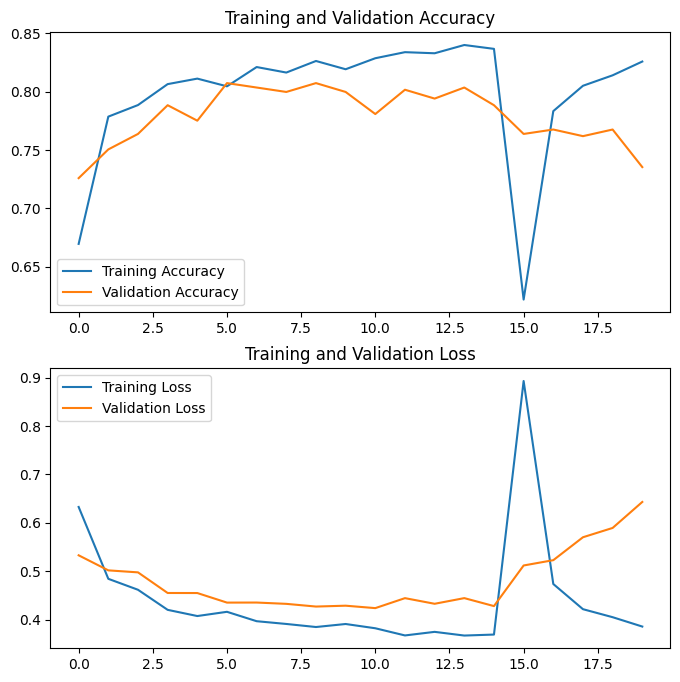

In [8]:
acc = history.history['accuracy'] + history_fine.history['accuracy']
val_acc = history.history['val_accuracy'] + history_fine.history['val_accuracy']

loss = history.history['loss'] + history_fine.history['loss']
val_loss = history.history['val_loss'] + history_fine.history['val_loss']

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(2,1,2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc*100:.2f}%')

21/21 ━━━━━━━━━━━━━━━━━━━━ 174s 9s/step - accuracy: 0.8989 - loss: 0.2539
Test Accuracy: 78.03%


In [10]:
import numpy as np
from sklearn.metrics import classification_report

pred_probs = model.predict(test_generator)
pred_labels = (pred_probs > 0.5).astype(int)
true_labels = test_generator.classes
print(classification_report(true_labels, pred_labels, target_names=['Benign', 'Malignant']))

21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 328ms/step
              precision    recall  f1-score   support

      Benign       0.72      0.97      0.83       360
   Malignant       0.93      0.56      0.70       300

    accuracy                           0.78       660
   macro avg       0.83      0.76      0.76       660
weighted avg       0.82      0.78      0.77       660



21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step


<Figure size 600x600 with 0 Axes>

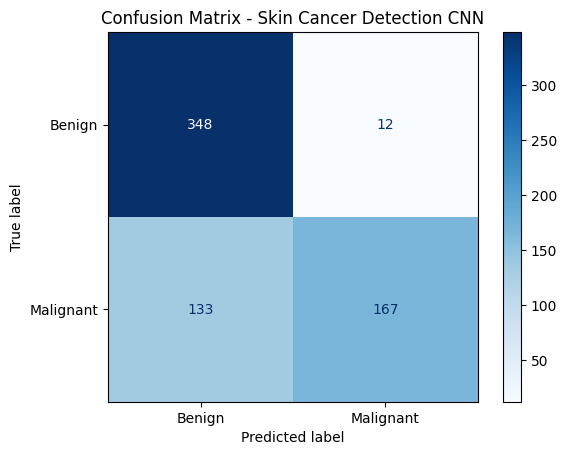

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype(int).ravel()

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Skin Cancer Detection CNN')
plt.show()

In [12]:
model.save("/content/skin_cancer_model.h5")

In [ ]:
!pip install gradio tensorflow pillow

import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

MODEL_PATH = "/content/skin_cancer_model.h5"
model = tf.keras.models.load_model(MODEL_PATH)

def predict_skin_cancer(img):

    img = img.convert("RGB")
    img = img.resize((224, 224))

    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]

    if prediction >= 0.5:
        label = "🩸 Malignant (Cancerous)"
        confidence = prediction * 100
    else:
        label = "✅ Benign (Non-Cancerous)"
        confidence = (1 - prediction) * 100

    return f"{label}\nConfidence: {confidence:.2f}%"

interface = gr.Interface(
    fn=predict_skin_cancer,
    inputs=gr.Image(type="pil", label="Upload a Skin Lesion Image"),
    outputs=gr.Textbox(label="Prediction Result"),
    title="🧠 Skin Cancer Detection using CNN (MobileNetV2)",
    description="Upload a skin lesion image to classify it as Benign or Malignant using a fine-tuned MobileNetV2 model.",
    examples=[]
)

interface.launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://3d280512542f0697f4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
